In [1]:
import mdtraj as md
import numpy as np
import os
from Bio import pairwise2


protein='Beta-1'
#select folder created by parse_AF_output script
folder='results'


/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
fullMSA=md.load(folder+'/fullMSA_noH.pdb')




clusters = []

# Sort filenames numerically based on the number after 'clus'
def extract_cluster_number(filename):
    # Extract the number part from 'clusX.pdb'
    return int(filename[4:-4])

# Get the sorted list of filenames
sorted_filenames = sorted(
    [f for f in os.listdir(folder) if f.startswith('clus') and f.endswith('.pdb')],
    key=extract_cluster_number
)

for filename in sorted_filenames:
    cluster = md.load(os.path.join(folder, filename))
    clusters.append(cluster)

trajectory = clusters[0]
for cluster in clusters[1:]:
    trajectory += cluster


#load plDDT and cluster size values from the file written by get-pldtt-cluster_size.sh
plddt = np.load(folder+'/plddt.npy')
cl_size = np.load(folder+'/size.npy')

In [3]:
rmsd=np.load('results/rmsd.npy')

/tmp/ipykernel_13961/3317421937.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=15)


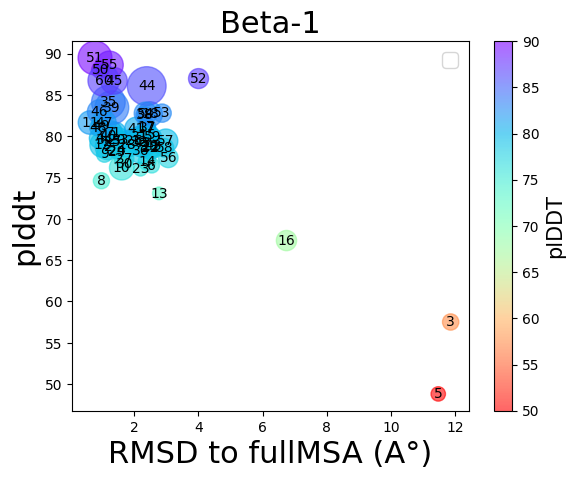

In [4]:
import matplotlib.pyplot as plt

plt.title(protein, fontsize=22)
sc = plt.scatter(rmsd * 10, plddt, c=plddt, cmap='rainbow_r', vmin=50, vmax=90, s=cl_size*3, alpha=0.6)
cbar = plt.colorbar(sc, label='plDDT')  # Create colorbar and set label

# Set font size for colorbar label
cbar.ax.yaxis.label.set_fontsize(15)


for i, (x, y) in enumerate(zip(rmsd * 10, plddt)):
    plt.text(x, y, str(i+1), fontsize=10, ha='center', va='center', color='black')

# Adding dashed lines
#plt.axhline(y=4, color='black', linestyle='--')
#plt.axvline(x=4, color='black', linestyle='--')

# Setting limits and ticks for both axes
#plt.xlim([0, 23])
#plt.ylim([7, 22])
#plt.xticks([4,8,12,16], fontsize=22)
#plt.yticks([4,8,12,16], fontsize=22)

# Adding labels and legend
plt.xlabel('RMSD to fullMSA (A°)', fontsize=22)
plt.ylabel('plddt', fontsize=22)
plt.legend(fontsize=15)

plt.show()

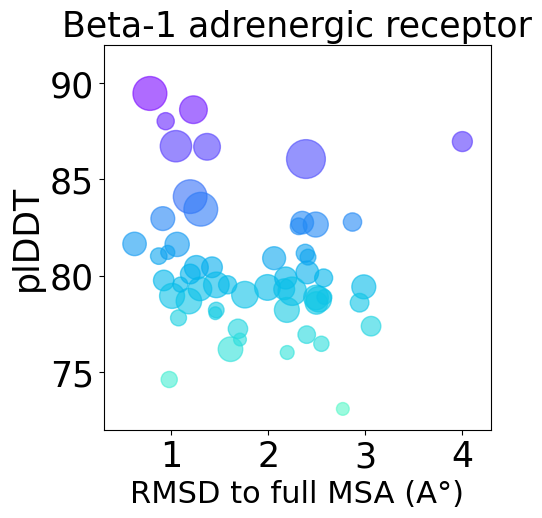

In [5]:
plt.figure(figsize=(5, 5))
plt.title('Beta-1 adrenergic receptor', fontsize=25)
sc = plt.scatter(rmsd * 10, plddt, c=plddt, cmap='rainbow_r', vmin=50, vmax=90, s=cl_size*3, alpha=0.6)
#cbar = plt.colorbar(sc, label='plDDT')  # Create colorbar and set label

# Set font size for colorbar label
#cbar.ax.yaxis.label.set_fontsize(15)


#for i, (x, y) in enumerate(zip(rmsd * 10, plddt)):
#    plt.text(x, y, str(i+1), fontsize=10, ha='center', va='center', color='black')

# Adding dashed lines
#plt.axhline(y=4, color='black', linestyle='--')
#plt.axvline(x=4, color='black', linestyle='--')

# Setting limits and ticks for both axes
plt.xlim([0.3, 4.3])
plt.ylim([72, 92])
plt.xticks([1,2,3,4], fontsize=25)
plt.yticks([75,80,85,90], fontsize=25)

# Adding labels and legend
plt.xlabel('RMSD to full MSA (A°)', fontsize=22)
plt.ylabel('plDDT', fontsize=25)
#plt.legend(fontsize=15)

plt.savefig('beta1_2D.png', bbox_inches='tight', pad_inches=0.5)

plt.show()